In [578]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [579]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [580]:
data_path = r"C:\Users\sm185567\Downloads\bug files\springfulldataset.csv"

In [581]:
data_raw = pd.read_csv(data_path,encoding = 'ISO-8859-15')

data_raw.shape

(22321, 5)

In [582]:
data_raw.head()

,Unnamed: 0,Priority,Created,Resolved,text
0,0,Major,10/1/2007 1:30,10/28/2007 11:50,Endpoint Mapping and Saxon
1,1,Major,9/25/2007 17:42,10/20/2007 0:18,Thread safe problem during wsdl generation
2,2,Blocker,9/25/2007 4:42,10/19/2007 21:53,SaajUtils wrong way to detect SAAJ version
3,3,Trivial,9/20/2007 23:11,9/20/2007 23:25,Incorrect javadoc in org.springframework.ws.soap.SoapFault
4,4,Major,9/8/2007 17:05,9/9/2007 8:01,Loading default key store overwrites truststore


In [583]:
data_raw  = data_raw.rename(columns={"text": "Summary"})
data_raw = data_raw.drop(['Unnamed: 0'],axis=1)
data_raw

,Priority,Created,Resolved,Summary
0,Major,10/1/2007 1:30,10/28/2007 11:50,Endpoint Mapping and Saxon
1,Major,9/25/2007 17:42,10/20/2007 0:18,Thread safe problem during wsdl generation
2,Blocker,9/25/2007 4:42,10/19/2007 21:53,SaajUtils wrong way to detect SAAJ version
3,Trivial,9/20/2007 23:11,9/20/2007 23:25,Incorrect javadoc in org.springframework.ws.soap.SoapFault
4,Major,9/8/2007 17:05,9/9/2007 8:01,Loading default key store overwrites truststore
...,...,...,...,...
22316,Major,2/11/2009 6:12,2/16/2009 0:53,Multi-dimensional array brakes HTTP invokers remoting
22317,Major,2/10/2009 22:00,2/12/2009 3:45,Possible NPE in JmsUtils.buildExceptionMessage and JmsException.getMessage
22318,Major,2/4/2009 23:44,12/26/2018 17:28,throws clause ignored by pointcut parser
22319,Minor,2/4/2009 10:36,12/28/2018 11:38,Can bind to generic attribute but not generic parameter


In [584]:
data_raw.info(null_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22321 entries, 0 to 22320
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Priority  21990 non-null  object
 1   Created   22321 non-null  object
 2   Resolved  22321 non-null  object
 3   Summary   22321 non-null  object
dtypes: object(4)
memory usage: 697.7+ KB


In [585]:
data_raw.dtypes

Priority    object
Created     object
Resolved    object
Summary     object
dtype: object

In [586]:
data_raw = data_raw.dropna( how='all',
                    subset=['Resolved'])

In [587]:
data_raw.info(null_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22321 entries, 0 to 22320
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Priority  21990 non-null  object
 1   Created   22321 non-null  object
 2   Resolved  22321 non-null  object
 3   Summary   22321 non-null  object
dtypes: object(4)
memory usage: 871.9+ KB


In [588]:
data_raw = data_raw.dropna( how='all',
                    subset=['Priority'])

In [589]:
data_raw.info(null_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21990 entries, 0 to 22320
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Priority  21990 non-null  object
 1   Created   21990 non-null  object
 2   Resolved  21990 non-null  object
 3   Summary   21990 non-null  object
dtypes: object(4)
memory usage: 859.0+ KB


# preprocessing of time 

In [590]:
type(pd.to_datetime(data_raw['Resolved'])[0])

pandas._libs.tslibs.timestamps.Timestamp

In [591]:
(pd.to_datetime(data_raw['Resolved']).head() - pd.to_datetime(data_raw['Created']).head())/np.timedelta64(1, 'D')

0    27.430556
1    24.275000
2    24.715972
3    0.009722 
4    0.622222 
dtype: float64

In [592]:
data_raw['time'] = (pd.to_datetime(data_raw['Resolved'])-  pd.to_datetime(data_raw['Created']))/np.timedelta64(1, 'D')

In [593]:
data_raw.info(null_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21990 entries, 0 to 22320
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Priority  21990 non-null  object 
 1   Created   21990 non-null  object 
 2   Resolved  21990 non-null  object 
 3   Summary   21990 non-null  object 
 4   time      21990 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.5+ MB


In [594]:
data_raw['time'].isnull().sum()

0

In [595]:
def conv(hi):
    hi = hi/30
    return (round(hi))
    

data_raw['time'] = data_raw['time'].apply(conv)

In [596]:

data_raw['time'].describe()

count    21990.000000
mean     5.037972    
std      14.505798   
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      2.000000    
max      142.000000  
Name: time, dtype: float64

<AxesSubplot:xlabel='time'>

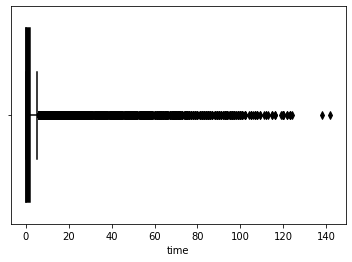

In [597]:
import seaborn as sns
#sns.boxplot(x=data_raw['time'])
sns.boxplot(x = data_raw['time'], data = data_raw,color="black")

In [598]:
data_raw['time']  = data_raw['time'].clip(lower=data_raw['time'].quantile(0.05), upper=data_raw['time'].quantile(0.95))

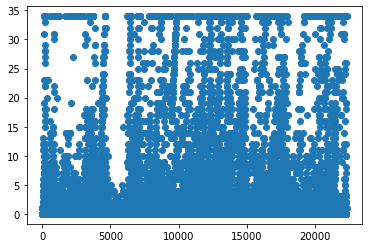

In [599]:

import matplotlib.pyplot as plt
plt.scatter(data_raw['time'].index, data_raw['time'])
plt.show()

In [600]:
data_raw['time'].describe()

count    21990.000000
mean     3.704729    
std      8.656228    
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      2.000000    
max      34.000000   
Name: time, dtype: float64

In [601]:
def convsmall(hi):
    hi = str(hi)
    for i in range(len(hi)-1,0,-1):
         hi = hi.replace(hi[i],'0')
    return(int(hi))

In [602]:
data_raw['time']
#data_raw['time'] = data_raw['time'].apply(convsmall)

0        1 
1        1 
2        1 
3        0 
4        0 
        .. 
22316    0 
22317    0 
22318    34
22319    34
22320    1 
Name: time, Length: 21990, dtype: int64

In [603]:
data_raw['time'].value_counts()

0     13563
1     2691 
34    1123 
2     1061 
3     576  
4     386  
5     292  
6     236  
7     203  
8     186  
9     150  
10    133  
11    118  
12    108  
16    104  
13    98   
18    85   
17    83   
14    82   
15    68   
20    62   
21    60   
23    55   
19    55   
22    53   
26    42   
28    42   
24    41   
27    40   
30    39   
25    39   
33    33   
32    29   
31    29   
29    25   
Name: time, dtype: int64

In [604]:
#0,1to5,6toremaining
13768,2691+1061+576+386+292,236+203+186+150+816+406+1220

(13768, 5006, 3217)

In [605]:
for i in data_raw['time']:
    if i <=5  and i>0:
        data_raw["time"].replace({i:1}, inplace=True)

In [606]:
data_raw["time"].value_counts()

0     13563
1     5006 
34    1123 
6     236  
7     203  
8     186  
9     150  
10    133  
11    118  
12    108  
16    104  
13    98   
18    85   
17    83   
14    82   
15    68   
20    62   
21    60   
23    55   
19    55   
22    53   
26    42   
28    42   
24    41   
27    40   
30    39   
25    39   
33    33   
32    29   
31    29   
29    25   
Name: time, dtype: int64

In [607]:
for i in data_raw['time']:
    if i >=6:
        data_raw["time"].replace({i:2}, inplace=True)
    

In [608]:
data_raw["time"].value_counts()

0    13563
1    5006 
2    3421 
Name: time, dtype: int64

# priority 

In [609]:
data_raw.Priority.value_counts()

Minor       9736
Major       9623
Critical    1305
Trivial     714 
Blocker     612 
Name: Priority, dtype: int64

In [610]:
data_raw["Priority"].replace({"Trivial": "Minor", "Blocker": "Critical"}, inplace=True)

In [611]:
data_raw.Priority.value_counts()

Minor       10450
Major       9623 
Critical    1917 
Name: Priority, dtype: int64

In [612]:
data_raw["Priority"].replace({"Critical": 0, "Major": 1,"Minor":2}, inplace=True)
data_raw["Priority"]

0        1
1        1
2        0
3        2
4        1
        ..
22316    1
22317    1
22318    1
22319    2
22320    1
Name: Priority, Length: 21990, dtype: int64

In [613]:
data_raw["Priority"].value_counts()

2    10450
1    9623 
0    1917 
Name: Priority, dtype: int64

# deleting unnecessary rows

In [614]:
data_raw.columns.values

array(['Priority', 'Created', 'Resolved', 'Summary', 'time'], dtype=object)

In [615]:
data_raw = data_raw[['Priority','Summary','time']]

In [616]:
data_raw

,Priority,Summary,time
0,1,Endpoint Mapping and Saxon,1
1,1,Thread safe problem during wsdl generation,1
2,0,SaajUtils wrong way to detect SAAJ version,1
3,2,Incorrect javadoc in org.springframework.ws.soap.SoapFault,0
4,1,Loading default key store overwrites truststore,0
...,...,...,...
22316,1,Multi-dimensional array brakes HTTP invokers remoting,0
22317,1,Possible NPE in JmsUtils.buildExceptionMessage and JmsException.getMessage,0
22318,1,throws clause ignored by pointcut parser,2
22319,2,Can bind to generic attribute but not generic parameter,2


In [617]:
categories = list(data_raw.columns.values)
categories = categories[0:]
categories = ['Priority', 'time']

In [618]:
# data cleaning for summary column

In [619]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [620]:
data_raw['Summary'].head()

0    Endpoint Mapping and Saxon                                
1    Thread safe problem during wsdl generation                
2    SaajUtils wrong way to detect SAAJ version                
3    Incorrect javadoc in org.springframework.ws.soap.SoapFault
4    Loading default key store overwrites truststore           
Name: Summary, dtype: object

In [621]:
data = data_raw.copy()

In [622]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(text): #function to clean the word of any punctuation or special characters
    '''cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = re.sub('http.*', '',cleaned)
    cleaned = re.sub('-', '',cleaned)
    cleaned = re.sub('[!@#$%^&+*]/g','',cleaned)
    cleaned = re.sub('[0-9\n]/g','',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    cleaned = cleaned.replace("@"," ")
    cleaned = cleaned.replace("+"," ")'''
    lines=text.lower()
    #print(lines)
    #lines = lines.replace('(','').replace(')','')  .replace('<','').replace('>','').replace('br','').replace("'","") 
    #remove the text in braces or just braces?
    #a new stopwords if required?
    #we need to remove pattern string appened?
    #external message should be removed
   # lines = re.sub('[@#:;?\./,-]', ' ',lines)
    #lines = re.sub('https.*', ' ',lines)
    #lines = re.sub(r'http\S+', '', lines, flags=re.MULTILINE)
    
    #lines = re.sub('co.*', ' ',lines)
    #lines = re.sub('[0-9]', ' ',lines)
    #lines = re.sub('\n', ' ',lines)
    #lines = lines.encode('ascii', 'ignore').decode('ascii')
    #lines = lines.replace('{','').replace('}','')  .replace('+','')
    lines = " ".join(lines.split())
   
    return lines


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [623]:
#data['Summary'] = data['Summary'].str.lower()
#data['Summary'] = data['Summary'].apply(cleanHtml)
data['Summary'] = data['Summary'].apply(cleanPunc)
#data['Summary'] = data['Summary'].apply(keepAlpha)
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)
data['Summary'].head(20)

0     endpoint mapping and saxon                                                                                                      
1     thread safe problem during wsdl generation                                                                                      
2     saajutils wrong way to detect saaj version                                                                                      
3     incorrect javadoc in org.springframework.ws.soap.soapfault                                                                      
4     loading default key store overwrites truststore                                                                                 
5     xpathexpression is not thread-safe                                                                                              
6     ws-security exception not being handled                                                                                         
7     order of setting properties in webservicegateways

In [624]:
stop_words = set(stopwords.words('english'))

In [625]:
'''re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)'''
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
def removeStopWords(text):
    words = [word for word in text.split() if word.lower() not in sw_nltk]
    new_text = " ".join(words)
    return new_text

#data['Summary'] = data['Summary'].apply(removeStopWords)
data.head()

,Priority,Summary,time
0,1,endpoint mapping and saxon,1
1,1,thread safe problem during wsdl generation,1
2,0,saajutils wrong way to detect saaj version,1
3,2,incorrect javadoc in org.springframework.ws.soap.soapfault,0
4,1,loading default key store overwrites truststore,0


In [626]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['Summary'] = data['Summary'].apply(stemming)
data.head()

,Priority,Summary,time
0,1,endpoint mapping and saxon,1
1,1,thread safe problem during wsdl generation,1
2,0,saajutils wrong way to detect saaj version,1
3,2,incorrect javadoc in org.springframework.ws.soap.soapfault,0
4,1,loading default key store overwrites truststore,0


In [627]:
data.to_csv("preprocessed_data.csv")

In [512]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=False)

print(train.shape)
print(test.shape)

(15393, 3)
(6597, 3)


In [513]:
train.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            15710, 15711, 15712, 15713, 15714, 15715, 15716, 15717, 15718,
            15719],
           dtype='int64', length=15393)

In [514]:
train_text = train['Summary']
test_text = test['Summary']

In [515]:
y_test = test[['Priority','time']]

In [516]:
y_train = train[['Priority','time']]

In [517]:
y_train.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            15710, 15711, 15712, 15713, 15714, 15715, 15716, 15717, 15718,
            15719],
           dtype='int64', length=15393)

In [518]:
from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer = TfidfVectorizer()
vectorizer.fit(train_text)
#vectorizer.fit(train_text)
#vectorizer.fit(test_text)

TfidfVectorizer()

In [519]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['Summary'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['Summary'], axis=1)

In [520]:
x_train.shape

(15393, 12952)

In [521]:
x_train

<15393x12952 sparse matrix of type '<class 'numpy.float64'>'
	with 128704 stored elements in Compressed Sparse Row format>

In [522]:
x_train = pd.DataFrame(x_train.toarray())
x_test = pd.DataFrame(x_test.toarray())

In [523]:
y_train = y_train.reset_index(drop = True)

In [524]:
y_train

,Priority,time
0,1,1
1,1,1
2,0,1
3,2,0
4,1,0
...,...,...
15388,2,0
15389,2,0
15390,2,0
15391,1,0


In [525]:
y_train['Priority'].value_counts()

2    7289
1    6643
0    1461
Name: Priority, dtype: int64

In [526]:
y_train['time'].value_counts()

0    9560
1    3525
2    2308
Name: time, dtype: int64

In [527]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(x_train, y_train['Priority']) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 

KeyboardInterrupt: 

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTENC
#oversample = BorderlineSMOTE()
#oversample = SMOTE()
#oversample = RandomOverSampler(random_state=42)
from imblearn.over_sampling import KMeansSMOTE
#oversample = KMeansSMOTE(random_state=42)
from imblearn.over_sampling import SVMSMOTE
oversample =   SVMSMOTE(random_state=42)
#oversample =   ADASYN(random_state=42)
#oversample =   SMOTENC(random_state=42,categorical_features=3398)
X_train_res, y_train_res = oversample.fit_resample(x_train, y_train['time']) 

# smote

In [ ]:
# -*- coding: utf-8 -*-
# Importing required Library
import numpy as np
import pandas as pd
import random
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors


In [ ]:

def get_tail_label(df):
    """
    Give tail label colums of the given target dataframe
    
    args
    df: pandas.DataFrame, target label df whose tail label has to identified
    
    return
    tail_label: list, a list containing column name of all the tail label
    """
    columns = df.columns
    n = len(columns)
    irpl = np.zeros(n)
    for column in range(n):
        irpl[column] = df[columns[column]].value_counts()[1]
    irpl = max(irpl)/irpl
    mir = np.average(irpl)
    tail_label = []
    for i in range(n):
        if irpl[i] > mir:
            tail_label.append(columns[i])
    return tail_label

In [ ]:
def get_index(df):
  """
  give the index of all tail_label rows
  args
  df: pandas.DataFrame, target label df from which index for tail label has to identified
    
  return
  index: list, a list containing index number of all the tail label
  """
  tail_labels = get_tail_label(df)
  index = set()
  for tail_label in tail_labels:
    sub_index = set(df[df[tail_label]==1].index)
    index = index.union(sub_index)
  return list(index)

In [ ]:
def get_minority_instace(X, y):
    """
    Give minority dataframe containing all the tail labels
    
    args
    X: pandas.DataFrame, the feature vector dataframe
    y: pandas.DataFrame, the target vector dataframe
    
    return
    X_sub: pandas.DataFrame, the feature vector minority dataframe
    y_sub: pandas.DataFrame, the target vector minority dataframe
    """
    index = get_index(y)
    X_sub = X[X.index.isin(index)].reset_index(drop = True)
    y_sub = y[y.index.isin(index)].reset_index(drop = True)
    return X_sub, y_sub

In [ ]:
def nearest_neighbour(X):
    """
    Give index of 5 nearest neighbor of all the instance
    
    args
    X: np.array, array whose nearest neighbor has to find
    
    return
    indices: list of list, index of 5 NN of each element in X
    """
    nbs=NearestNeighbors(n_neighbors=5,metric='euclidean',algorithm='kd_tree').fit(X)
    euclidean,indices= nbs.kneighbors(X)
    return indices

In [ ]:
def MLSMOTE(X,y, n_sample):
    """
    Give the augmented data using MLSMOTE algorithm
    
    args
    X: pandas.DataFrame, input vector DataFrame
    y: pandas.DataFrame, feature vector dataframe
    n_sample: int, number of newly generated sample
    
    return
    new_X: pandas.DataFrame, augmented feature vector data
    target: pandas.DataFrame, augmented target vector data
    """
    indices2 = nearest_neighbour(X)
    n = len(indices2)
    new_X = np.zeros((n_sample, X.shape[1]))
    target = np.zeros((n_sample, y.shape[1]))
    for i in range(n_sample):
        reference = random.randint(0,n-1)
        neighbour = random.choice(indices2[reference,1:])
        all_point = indices2[reference]
        nn_df = y[y.index.isin(all_point)]
        ser = nn_df.sum(axis = 0, skipna = True)
        target[i] = np.array([1 if val>2 else 0 for val in ser])
        ratio = random.random()
        gap = X.loc[reference,:] - X.loc[neighbour,:]
        new_X[i] = np.array(X.loc[reference,:] + ratio * gap)
    new_X = pd.DataFrame(new_X, columns=X.columns)
    target = pd.DataFrame(target, columns=y.columns)
    new_X = pd.concat([X, new_X], axis=0)
    target = pd.concat([y, target], axis=0)
    return new_X, target

In [ ]:
 X_sub, y_sub = get_minority_instace(x_train, y_train) 

In [ ]:
X_sub.shape,y_sub.shape

In [ ]:
X_res,y_res =MLSMOTE(X_sub, y_sub, 100) 

In [ ]:
X_res.shape,y_res.shape

In [ ]:
y_res.shape

In [ ]:
y_res

# model building 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                    ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(X_res, y_res[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))
    print("\n")

In [ ]:
y_res

In [ ]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(X_res, y_res)



In [ ]:
# predict
predictions = classifier.predict(x_test)

# accuracy


In [ ]:
predictions

In [ ]:
df = pd.DataFrame(predictions.toarray())

In [ ]:
df.rename(columns = {0:'Priority',1:'time'}, inplace = True)

In [ ]:

print("Accuracy = ",accuracy_score(y_test['Priority'],df['Priority']))
print("\n")

In [ ]:
print("Accuracy = ",accuracy_score(y_test['time'],df['time']))

# classifer chains

In [ ]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [ ]:
y_res['Priority'].value_counts()

In [ ]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(X_res, y_res)

# predict
predictions = classifier.predict(x_test)



In [ ]:
df = pd.DataFrame(predictions.toarray())
df.rename(columns = {0:'Priority',1:'time'}, inplace = True)

In [ ]:
# accuracy
print("Accuracy = ",accuracy_score(y_test['Priority'],df['Priority']))
print("Accuracy = ",accuracy_score(y_test['time'],df['time']))
print("\n")

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test['Priority'], df['Priority']))

### 3.4. Label Powerset

In [ ]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [ ]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)


In [ ]:
df = pd.DataFrame(predictions.toarray())
df.rename(columns = {0:'Priority',1:'time'}, inplace = True)
# accuracy
print("Accuracy = ",accuracy_score(y_test['Priority'],df['Priority']))
print("\n")

In [ ]:
print("Accuracy = ",accuracy_score(y_test['time'],df['time']))
print("\n")

### 3.5. Adapted Algorithm

In [ ]:
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [ ]:
%%time

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)



In [ ]:
df = pd.DataFrame(predictions.toarray())
df.rename(columns = {0:'Priority',1:'time'}, inplace = True)
# accuracy
print("Accuracy = ",accuracy_score(y_test['Priority'],df['Priority']))
print("\n")
print("Accuracy = ",accuracy_score(y_test['time'],df['time']))
print("\n")

In [ ]:
hi = [("satya",30,10000),("rakesh",20,20000),("kaushtub",40,3000)]

In [ ]:
hi.sort(key=lambda x:x[2])

In [ ]:
hi